# A notebook to compute the total crime rate for each month and write out the total per LGA and year
* The offences are reported for each month as rates per 100 000  
* I have simply summed all 89 reported offence rates to get an overall crime rate indication per month 
* The month reported rates are summed into the annual reported rate  

In [ ]:
import pandas as pd
import numpy as np
import math 

In [42]:
offence_rates_fn = '../data/LGAReportedOffencesRates.csv'
annual_sum_offence_rates_fn = '../data/annual_total_offence_rates.csv '
offence_rates_df = pd.read_csv(offence_rates_fn)
offence_rates_df.head(10)

,LGA Name,Month Year,Homicide (Murder),Other Homicide,Attempted Murder,Conspiracy to Murder,Manslaughter (excl. by driving),Manslaughter Unlawful Striking Causing Death,Driving Causing Death,Assault,...,Public Nuisance,Stock Related Offences,Traffic and Related Offences,Dangerous Operation of a Vehicle,Drink Driving,Disqualified Driving,Interfere with Mechanism of Motor Vehicle,Miscellaneous Offences,Other Offences,Unnamed: 90
0,Aurukun Shire Council,Jan-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,1210.428305,...,1396.648045,0.0,558.659218,0.00000,372.439479,186.219739,0.0,0.00000,3445.065177,1
1,Aurukun Shire Council,Feb-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,1396.648045,...,1117.318436,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,2513.966480,2
2,Aurukun Shire Council,Mar-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,2048.417132,...,1303.538175,0.0,372.439479,93.10987,186.219739,93.109870,0.0,0.00000,2700.186220,3
3,Aurukun Shire Council,Apr-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,1210.428305,...,558.659218,0.0,744.878957,0.00000,465.549348,279.329609,0.0,0.00000,3817.504656,4
4,Aurukun Shire Council,May-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,837.988827,...,372.439479,0.0,186.219739,0.00000,93.109870,93.109870,0.0,0.00000,1396.648045,5
5,Aurukun Shire Council,Jun-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,465.549348,...,558.659218,0.0,279.329609,93.10987,93.109870,93.109870,0.0,0.00000,1303.538175,6
6,Aurukun Shire Council,Jul-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,651.769087,...,93.109870,0.0,93.109870,93.10987,0.000000,0.000000,0.0,0.00000,186.219739,7
7,Aurukun Shire Council,Aug-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,931.098696,...,558.659218,0.0,93.109870,0.00000,93.109870,0.000000,0.0,0.00000,931.098696,8
8,Aurukun Shire Council,Sep-01,0.0,93.10987,93.10987,0.0,0.0,0.0,0.0,372.439479,...,744.878957,0.0,186.219739,93.10987,93.109870,0.000000,0.0,93.10987,1396.648045,9
9,Aurukun Shire Council,Oct-01,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,186.219739,...,93.109870,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,744.878957,10


In [43]:
#set up a new data frame for the summary data
cols = ['LGA Name', 'Year', 'Month', 'Total Offence Rate' ]
rows = [ irow for irow in range(len(offence_rates_df)) ]
offence_rates_total_df = pd.DataFrame(columns=cols,index=rows)
offence_rates_total_df['LGA Name'] = offence_rates_df['LGA Name']

In [44]:
#calculate the sum of all the offences in the table and add it to the total df
col_list = list(offence_rates_df)
col_list.remove('LGA Name')
col_list.remove('Month Year')
offence_rates_total_df['Total Offence Rate']  = offence_rates_df[col_list].sum(axis=1)

In [45]:
#split the month-year into month and year 
month_dict = {'Jan':'1','Feb':'2','Mar':'3',"Apr":'4', 'May':'5','Jun':6,'Jul':7,'Aug':'8','Sep':'9','Oct':'10', 'Nov':'11', 'Dec':'12'}
for irow in range(len(offence_rates_df)):
    month_year = offence_rates_df.iloc[irow,1]
    field = month_year.split('-')
    year = 2000 + int(field[1])
    month = int(month_dict[field[0]])
    offence_rates_total_df.iloc[irow,1] = year
    offence_rates_total_df.iloc[irow,2] = month

offence_rates_total_df.head(10)    

,LGA Name,Year,Month,Total Offence Rate
0,Aurukun Shire Council,2001,1,17505.655493
1,Aurukun Shire Council,2001,2,14620.249536
2,Aurukun Shire Council,2001,3,16111.007448
3,Aurukun Shire Council,2001,4,17322.435754
4,Aurukun Shire Council,2001,5,8291.778399
5,Aurukun Shire Council,2001,6,7361.679702
6,Aurukun Shire Council,2001,7,5314.262569
7,Aurukun Shire Council,2001,8,6805.020484
8,Aurukun Shire Council,2001,9,6619.800745
9,Aurukun Shire Council,2001,10,6713.910614


In [46]:
#calculate the yearly mean for each LGA 
lga_sum = offence_rates_total_df.groupby(['Year', 'LGA Name'])['Total Offence Rate'].sum()

In [48]:
# now set up a dataframe for the mean total offence rate per year for each LGA 
lga_list = offence_rates_total_df['LGA Name'].unique()
year_list = offence_rates_total_df['Year'].unique()
lga_annual_sum_df = pd.DataFrame(columns=lga_list,index=year_list)
for year in year_list:
    for lga in lga_list:
        lga_annual_sum_df.loc[year,lga] = int(lga_sum[(year,lga)]/12)
lga_annual_sum_df.to_csv(annual_sum_offence_rates_fn)

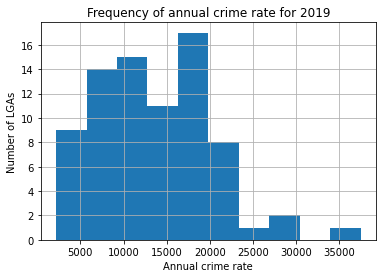

In [49]:
hist = lga_annual_sum_df.iloc[-2].hist(bins=10)
hist.set_xlabel("Annual crime rate")
hist.set_ylabel("Number of LGAs")
hist.set_title("Frequency of annual crime rate for 2019");